## Mahmoud Emara Term Project II

### Classification of Iris Flowers

Here, we are trying to classify different Iris flowers based on their pedal wdth and length, sepal width and length by their species type. There are three types of Iris flowers included in this data. k-Nearest Neighbor is used to classify the data and try to predict future input.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import numpy as np
import math

# There are 3 classes for this data
iris_dataset = datasets.load_iris()
splitRatio = 0.2
X = iris_dataset['data']
Y = iris_dataset['target']
trainSet, testSet, labels, testLab = train_test_split(X, Y, test_size = splitRatio)

print('Training set dimensions:',trainSet.shape,'\nTraining labels dimensions:',labels.shape)
print('Test set dimensions:',testSet.shape,'\nTest labels dimensions:',testLab.shape)

Training set dimensions: (120, 4) 
Training labels dimensions: (120,)
Test set dimensions: (30, 4) 
Test labels dimensions: (30,)


PCA of top 2 principal components: (120, 2)


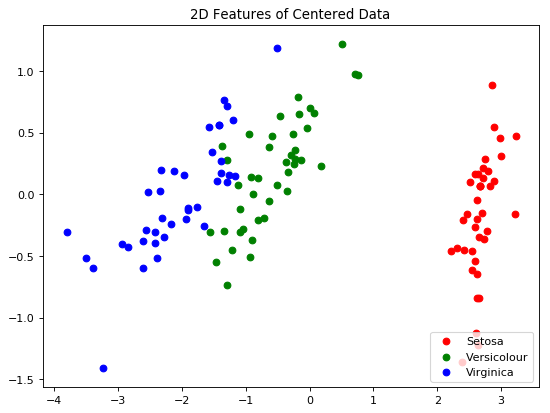

In [2]:
#PCA on centered data
meanVec = trainSet.T.mean(axis=1)
meanMat = np.tile(meanVec.reshape(4,1),(1,(int)((1-splitRatio)*150)))
centData = trainSet.T - meanMat

U, s, Vt = np.linalg.svd(centData)
kprinc = 2
princ = U[:,0:kprinc]
Xtilde = np.matmul(princ.T, centData)
print('PCA of top 2 principal components:',Xtilde.T.shape)

def coordinates(data, label, l):
    xcoord = list(); ycoord = list()
    for i in range(len(data)):
        if(label[i] == l):
            xcoord.append(Xtilde.T[i][0])
            ycoord.append(Xtilde.T[i][1])
    return xcoord, ycoord

zeroX, zeroY = coordinates(trainSet, labels, 0)
oneX, oneY = coordinates(trainSet, labels, 1)
twoX, twoY = coordinates(trainSet, labels, 2)

plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
zerPlot = plt.scatter(zeroX, zeroY, color='r', marker='o', label='Setosa')
onePlot = plt.scatter(oneX, oneY, color='g', marker='o', label='Versicolour')
twoPlot = plt.scatter(twoX, twoY, color='b', marker='o', label='Virginica')
plt.title('2D Features of Centered Data')
plt.legend(handles = [zerPlot, onePlot, twoPlot], loc='lower right')
plt.show()

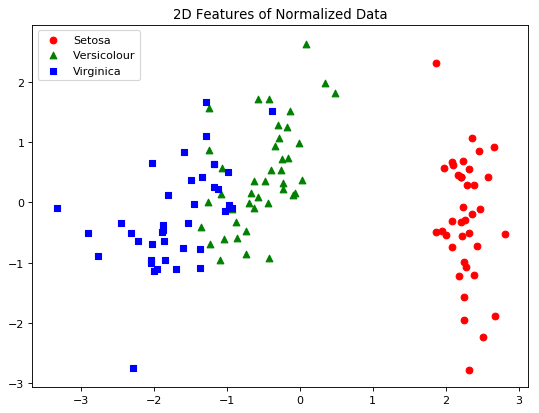

In [3]:
# Normalization of Data
normData = np.zeros((4,(int)((1-splitRatio)*150)))

for i in range(len(trainSet.T)):
    std = np.std(centData[i])
    for j in range(len(trainSet.T[0])):
        normData[i][j] = centData[i][j] / std

Un, sn, Vtn = np.linalg.svd(normData)
princN = Un[:,0:kprinc]
Xhat = np.matmul(princN.T, normData)

def coordinatesN(data, label, l):
    xcoord = list(); ycoord = list()
    for i in range(len(data)):
        if(label[i] == l):
            xcoord.append(Xhat.T[i][0])
            ycoord.append(Xhat.T[i][1])
    return xcoord, ycoord

zerX1, zerY1 = coordinatesN(trainSet, labels, 0)
oneX1, oneY1 = coordinatesN(trainSet, labels, 1)
twoX1, twoY1 = coordinatesN(trainSet, labels, 2)

plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
zerPlot1 = plt.scatter(zerX1, zerY1, color='r', marker='o', label='Setosa')
onePlot1 = plt.scatter(oneX1, oneY1, color='g', marker='^', label='Versicolour')
twoPlot1 = plt.scatter(twoX1, twoY1, color='b', marker='s', label='Virginica')
plt.title('2D Features of Normalized Data')
plt.legend(handles = [zerPlot1, onePlot1, twoPlot1], loc='upper left')
plt.show()

Above is the normalized data of the Iris training set, we see that the Setosa flowers are grouping together without any interference of the other flowers. Versicolour and Virginica seem to interect at almost a linear boundary with some outliers.

In [4]:
# Test Data normalization
tmeanVec = np.mean(testSet.T,axis=1)
tmeanMat = np.tile(tmeanVec.reshape(4,1),(1,(int)((splitRatio)*150)))
testCent = testSet.T - tmeanMat

testNorm = np.zeros((4,(int)(splitRatio*150)))
for i in range(len(testSet.T)):
    std = np.std(testCent[i])
    for j in range(len(testSet.T[0])):
        testNorm[i][j] = testCent[i][j] / std
        
print("Centered test data dim:",testCent.shape,"\nNormalized test data dim:",testNorm.shape)

#PCA on test data
testX = np.matmul(princN.T, testNorm)
print("Projected Test Data dim:",testX.shape)

Centered test data dim: (4, 30) 
Normalized test data dim: (4, 30)
Projected Test Data dim: (2, 30)


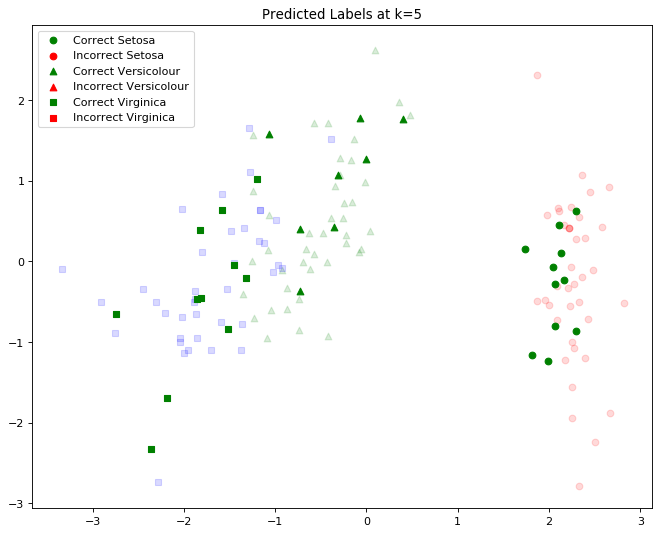

In [7]:
# K-NN of test data
kv=5

def calcDist(x1, y1, x2, y2):
    a = (x2 - x1)**2
    b = (y2 - y1)**2
    return math.sqrt(a+b)

def findNearestN(k, splitRatio):
    labelList = []
    predLabs = []
    for x in range(len(testX.T)):
        distList = list()
        for i in range(len(Xhat.T)-1):
            for j in range(len(Xhat.T[0])-1):
                d = calcDist(testX.T[x][j],testX.T[x][j+1],Xhat.T[i][j],Xhat.T[i][j+1])
                distList.append(d)
                distList.append(labels[i])
        dList = np.array(distList)
        vals = dList.reshape((int)(150*(1-splitRatio))-1,2)
        sortedList = sorted(vals, key=lambda y:y[0])
        for z in range(k):
            labelList.append(sortedList[z][1])
    predictions = np.array(labelList)
    pred = np.array(labelList).reshape((int)((splitRatio)*150),k)
    
    for l in range(len(pred)):
        counts = np.bincount(pred[l].astype(int))
        predLabs.append(np.argmax(counts))
    
    return predLabs
            
nearestN = findNearestN(kv, splitRatio)

# for i in range(30):
#     print(t1[i],' ',testLab[i])

def checkLabels(predictedL, label):
    correctX = list(); incorrectX = list()
    correctY = list(); incorrectY = list()
    numCorr = 0; numInco = 0
    
    for i in range(len(predictedL)):
        if(predictedL[i] == testLab[i] and predictedL[i] == label):
            correctX.append(testX.T[i][0])
            correctY.append(testX.T[i][1])
            numCorr += 1
        if(predictedL[i] != testLab[i] and predictedL[i] == label):
            incorrectX.append(testX.T[i][0])
            incorrectY.append(testX.T[i][1])
            numInco += 1
    return correctX, correctY, incorrectX, incorrectY, numCorr, numInco
    
corrX0, corrY0, incoX0, incoY0, co0, in0 = checkLabels(nearestN, 0)
corrX1, corrY1, incoX1, incoY1, co1, in1 = checkLabels(nearestN, 1)
corrX2, corrY2, incoX2, incoY2, co2, in2 = checkLabels(nearestN, 2)

plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
zerPlot1 = plt.scatter(zerX1, zerY1, color='r', marker='o', alpha = 0.15, label='Setosa')
onePlot1 = plt.scatter(oneX1, oneY1, color='g', marker='^', alpha = 0.15, label='Versicolour')
twoPlot1 = plt.scatter(twoX1, twoY1, color='b', marker='s', alpha = 0.15, label='Virginica')

testCo0 = plt.scatter(corrX0, corrY0, color='g', marker='o', label='Correct Setosa')
testIn0 = plt.scatter(incoX0, incoY0, color='r', marker='o', label='Incorrect Setosa')
testCo1 = plt.scatter(corrX1, corrY1, color='g', marker='^', label='Correct Versicolour')
testIn1 = plt.scatter(incoX1, incoY1, color='r', marker='^', label='Incorrect Versicolour')
testCo2 = plt.scatter(corrX2, corrY2, color='g', marker='s', label='Correct Virginica')
testIn2 = plt.scatter(incoX2, incoY2, color='r', marker='s', label='Incorrect Virginica')

plt.title("Predicted Labels at k=" + str(kv))
plt.legend(handles = [testCo0, testIn0, testCo1, testIn1, testCo2, testIn2], loc='upper left')
plt.show()

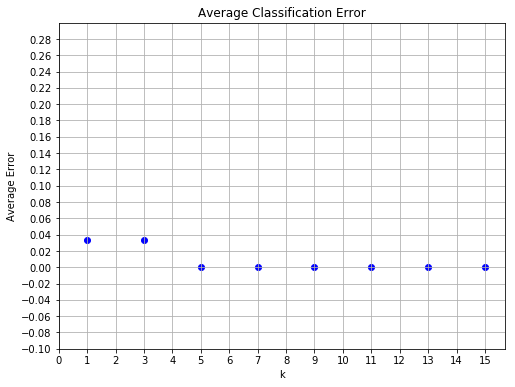

After running kNN through several iterations of K, we see that that k=5 nearest neighbors gives the lowest classification error of only 0.0


In [12]:
kvals = [1, 3, 5, 7, 9, 11, 13, 15]

def kNNError(k):
    tempN = findNearestN(k, splitRatio)
    cx0, cy0, ix0, iy0, c0, i0 = checkLabels(tempN, 0)
    cx1, cy1, ix1, iy1, c1, i1 = checkLabels(tempN, 1)
    cx2, cy2, ix2, iy2, c2, i2 = checkLabels(tempN, 2)
    avgClassErr = (i0+i1+i2) / len(testX.T)
    return avgClassErr

err1 = kNNError(1)
err3 = kNNError(3)
err5 = kNNError(5)
err7 = kNNError(7)
err9 = kNNError(9)
err11 = kNNError(11)
err13 = kNNError(13)
err15 = kNNError(15)
avgError = [err1, err3, err5, err7, err9, err11, err13, err15]

fig = plt.figure(figsize=(8,6))
plt.scatter(kvals, avgError, color='b')
plt.title('Average Classification Error')
plt.xlabel('k')
plt.xticks(np.arange(0, 16, 1))
plt.yticks(np.arange(-0.1, 0.3, 0.02))
plt.ylabel('Average Error')
plt.ylim(-0.1,0.3)
plt.grid()
plt.show()
print('After running kNN through several iterations of K, we see that that k=5 nearest neighbors gives the lowest classification error of only',np.min(avgError))